# Exercises 3, 4, 5

## 3

<img src="./images/03.png" width=700>

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
import timeit


time_cpu = []
for i in range(12):
  x = torch.rand(2 ** i, 2** i)
  time_cpu.append(timeit.timeit('x @ x', globals=globals(), number=100))

In [ ]:
time_cpu

[0.00165163299999449,
 0.003704134000003023,
 0.0005452370000114115,
 0.0010321540000006735,
 0.0003630020000002787,
 0.0011512540000069293,
 0.0010635160000163069,
 0.012624966000004179,
 0.04462854299998753,
 0.35189479799998935,
 2.64998232100001,
 23.287149865000004]

In [4]:
device = torch.device('cuda')
time_gpu = []
for i in range(12):
  x = torch.rand(2 ** i, 2** i)
  x = x.to(device)
  time_gpu.append(timeit.timeit('x @ x', globals=globals(), number=100))

In [5]:
time_gpu

[0.11766567799998029,
 0.02507661399999961,
 0.001197466999997232,
 0.001173566000034043,
 0.0011639699999932418,
 0.01120816200000263,
 0.0013527980000844764,
 0.004529629999979079,
 0.02665076199991745,
 0.0015469190000203525,
 0.0015845699999772478,
 0.0018686130000560297]

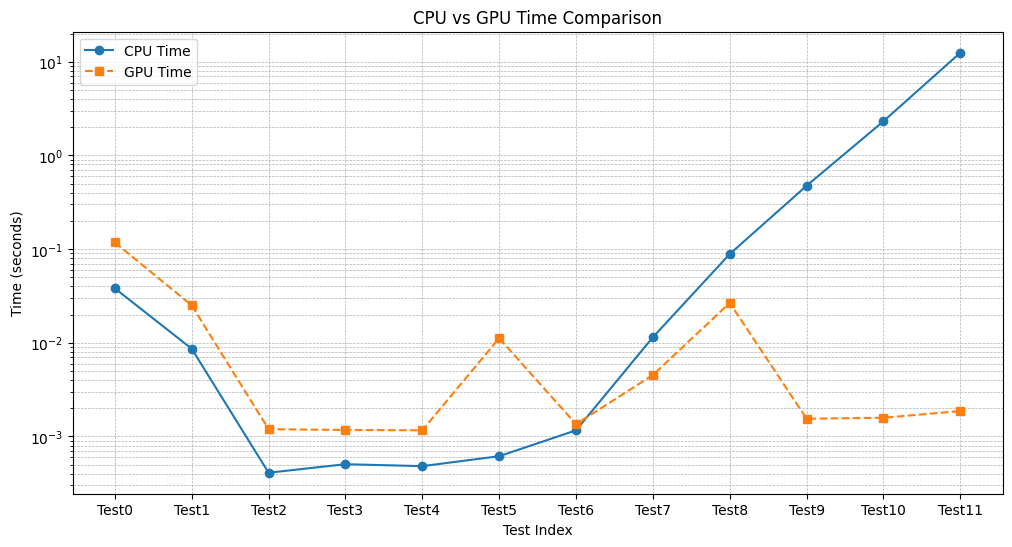

In [6]:
import matplotlib.pyplot as plt

# Generate indices for x-axis (1 to 12)
indices = list(range(0, len(time_cpu)))

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot CPU times
plt.plot(indices, time_cpu, marker='o', linestyle='-', label='CPU Time')

# Plot GPU times
plt.plot(indices, time_gpu, marker='s', linestyle='--', label='GPU Time')

# Set x and y labels
plt.xlabel('Test Index')
plt.ylabel('Time (seconds)')

# Set the title
plt.title('CPU vs GPU Time Comparison')

# Add a legend
plt.legend()

# Enable grid lines
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Use logarithmic scale for the y-axis
plt.yscale('log')

# Set x-ticks to be integer indices
labels = ['Test0', 'Test1', 'Test2',
          'Test3', 'Test4', 'Test5',
          'Test6', 'Test7', 'Test8',
          'Test9', 'Test10', 'Test11']
plt.xticks(indices, labels)

# Show the plot
plt.show()

## 4

<img src="./images/04.png" width=700>

In [8]:
import torch


def f(x):
  return (torch.sin(x - 2) * ((x + 2) ** 2)
        + torch.sqrt(torch.abs(torch.cos(x))))


x_param = torch.nn.Parameter(torch.rand(1), requires_grad=True)
optimizer = torch.optim.SGD([x_param], lr=0.01)

for epoch in range(50):
  optimizer.zero_grad()
  loss_incured = f(x_param)
  print(f'{epoch}.... loss: {loss_incured.data}')
  loss_incured.backward()
  optimizer.step()

print(f"x: {x_param.data}")

0.... loss: tensor([-4.8512])
1.... loss: tensor([-5.1108])
2.... loss: tensor([-5.3517])
3.... loss: tensor([-5.5719])
4.... loss: tensor([-5.7702])
5.... loss: tensor([-5.9463])
6.... loss: tensor([-6.1005])
7.... loss: tensor([-6.2337])
8.... loss: tensor([-6.3475])
9.... loss: tensor([-6.4435])
10.... loss: tensor([-6.5238])
11.... loss: tensor([-6.5902])
12.... loss: tensor([-6.6447])
13.... loss: tensor([-6.6891])
14.... loss: tensor([-6.7250])
15.... loss: tensor([-6.7539])
16.... loss: tensor([-6.7769])
17.... loss: tensor([-6.7953])
18.... loss: tensor([-6.8099])
19.... loss: tensor([-6.8214])
20.... loss: tensor([-6.8304])
21.... loss: tensor([-6.8375])
22.... loss: tensor([-6.8431])
23.... loss: tensor([-6.8474])
24.... loss: tensor([-6.8508])
25.... loss: tensor([-6.8535])
26.... loss: tensor([-6.8555])
27.... loss: tensor([-6.8571])
28.... loss: tensor([-6.8583])
29.... loss: tensor([-6.8593])
30.... loss: tensor([-6.8600])
31.... loss: tensor([-6.8606])
32.... loss: tenso

## 5

<img src="./images/05.png" width=700>

In [9]:
def f(x, y):
  return (((torch.exp(torch.sin(x) ** 2)) / (x - y) ** 2)
        + (x - y) ** 2)

xy_param = torch.nn.Parameter(torch.tensor([.2, 10]), requires_grad=True)
optimizer = torch.optim.SGD([xy_param], lr=0.01)

for epoch in range(500):
  optimizer.zero_grad()
  loss = f(xy_param[0], xy_param[1])
  print(f'{epoch}....loss: {loss.data}')
  loss.backward()
  optimizer.step()

print(f"x , y: {xy_param.data}")


0....loss: 96.05083465576172
1....loss: 88.52518463134766
2....loss: 81.59204864501953
3....loss: 75.20531463623047
4....loss: 69.3222885131836
5....loss: 63.903053283691406
6....loss: 58.91011047363281
7....loss: 54.3084716796875
8....loss: 50.06581497192383
9....loss: 46.15278244018555
10....loss: 42.5430793762207
11....loss: 39.21316909790039
12....loss: 36.14189147949219
13....loss: 33.30992126464844
14....loss: 30.699398040771484
15....loss: 28.2936954498291
16....loss: 26.077312469482422
17....loss: 24.035795211791992
18....loss: 22.155719757080078
19....loss: 20.424663543701172
20....loss: 18.831148147583008
21....loss: 17.364620208740234
22....loss: 16.015377044677734
23....loss: 14.77450942993164
24....loss: 13.633865356445312
25....loss: 12.585979461669922
26....loss: 11.624015808105469
27....loss: 10.741720199584961
28....loss: 9.933381080627441
29....loss: 9.193753242492676
30....loss: 8.518034934997559
31....loss: 7.9018049240112305
32....loss: 7.340998649597168
33....loss